<a href="https://colab.research.google.com/github/dschirmerii/fintechbootcamp-Project_2/blob/main/GAF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install pyts

     |████████████████████████████████| 2.5 MB 5.0 MB/s 


In [3]:
from fastai.vision import *
from fastai.vision import ItemsList
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField
import pandas as pd
# Math
import math
import numpy as np
from datetime import datetime, timedelta
import scipy

In [4]:
bs = 64
n_classes = 3
n_samples = 28

In [5]:
def tabulate(x, y, f):
    """Return a table of f(x, y). Useful for the Gram-like operations."""
    return np.vectorize(f)(*np.meshgrid(x, y, sparse=True))
def cos_sum(a, b):
    """To work with tabulate."""
    return(math.cos(a+b))

class GAF:

    def __init__(self):
        pass
    def __call__(self, serie):
        """Compute the Gramian Angular Field of an image"""
        # Min-Max scaling
        min_ = np.amin(serie)
        max_ = np.amax(serie)
        scaled_serie = (2*serie - max_ - min_)/(max_ - min_)

        # Floating point inaccuracy!
        scaled_serie = np.where(scaled_serie >= 1., 1., scaled_serie)
        scaled_serie = np.where(scaled_serie <= -1., -1., scaled_serie)
          # Polar encoding
        phi = np.arccos(scaled_serie)
        # Note! The computation of r is not necessary
        r = np.linspace(0, 1, len(scaled_serie))

        # GAF Computation (every term of the matrix)
        gaf = tabulate(phi, phi, cos_sum)

        return(gaf, phi, r, scaled_serie)

In [6]:
# Toy dataset
X = np.linspace(0,1,num=n_samples) **2
gaf = GAF()
g, _,_,_ = gaf(X)
print(g.shape)

(28, 28)


Text(0.5, 1.0, 'GAF')

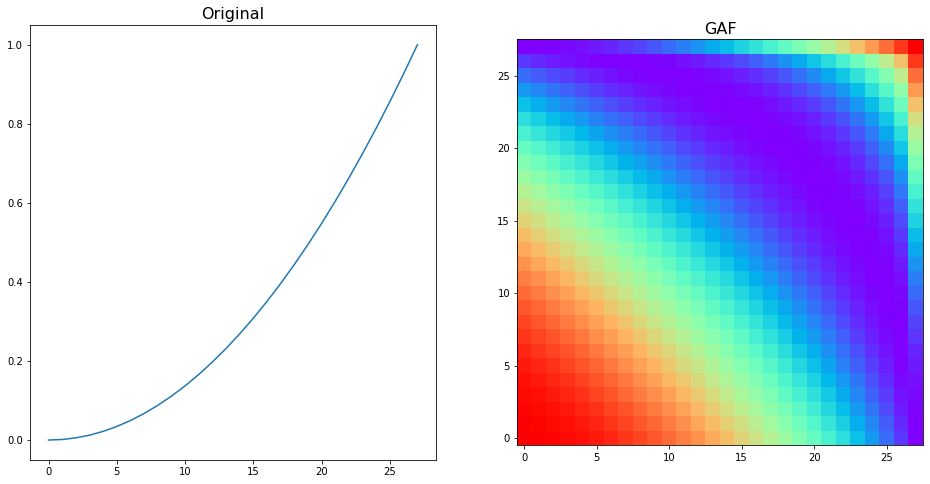

In [7]:
# Show the results for the first time series
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.plot(X)
plt.title("Original", fontsize=16)
plt.subplot(122)
plt.imshow(g, cmap='rainbow', origin='lower')
plt.title("GAF", fontsize=16)

In [8]:
aapl = pd.read_csv('/content/drive/MyDrive/Project 2/data/aapl.csv', parse_dates=['Date'], index_col=[1])
print(aapl.head().T)

Date          2017-01-04    2017-01-05  ...    2017-01-09    2017-01-10
Unnamed: 0  9.094000e+03  9.095000e+03  ...  9.097000e+03  9.098000e+03
Open        2.896250e+01  2.898000e+01  ...  2.948750e+01  2.969250e+01
High        2.912750e+01  2.921500e+01  ...  2.985750e+01  2.984500e+01
Low         2.893750e+01  2.895250e+01  ...  2.948500e+01  2.957500e+01
Close       2.900500e+01  2.915250e+01  ...  2.974750e+01  2.977750e+01
Adj Close   2.738269e+01  2.752194e+01  ...  2.808366e+01  2.811198e+01
Volume      8.447240e+07  8.877440e+07  ...  1.342476e+08  9.784840e+07

[7 rows x 5 columns]


In [9]:
aapl.drop(columns=['Unnamed: 0'],inplace=True)

In [10]:
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.382690,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.521944,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.828764,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.083660,134247600
2017-01-10,29.692499,29.844999,29.575001,29.777500,28.111979,97848400


In [11]:
aapl['Value'] = (aapl['High']+aapl['Low'])/2.0
y = aapl['Value']
ahead = y.shift(-1)
new_y = 100.0*(ahead/y-1)
y = pd.qcut(new_y, 3,labels=False).dropna().astype('int')
print(y.head(10), aapl['Value'].head(10))

Date
2017-01-04    1
2017-01-05    2
2017-01-06    2
2017-01-09    1
2017-01-10    1
2017-01-11    0
2017-01-12    1
2017-01-13    1
2017-01-17    2
2017-01-18    0
Name: Value, dtype: int64 Date
2017-01-04    29.032501
2017-01-05    29.083749
2017-01-06    29.328750
2017-01-09    29.671250
2017-01-10    29.710000
2017-01-11    29.816250
2017-01-12    29.688750
2017-01-13    29.803750
2017-01-17    29.807499
2017-01-18    30.026250
Name: Value, dtype: float64


In [12]:
ls

drive/  sample_data/


In [13]:
path = Path('/content/drive/MyDrive/Project 2/data')
print(path.ls())

[PosixPath('/content/drive/MyDrive/Project 2/data/aapl.csv'), PosixPath('/content/drive/MyDrive/Project 2/data/Bullish'), PosixPath('/content/drive/MyDrive/Project 2/data/Bearish'), PosixPath('/content/drive/MyDrive/Project 2/data/Neutral'), PosixPath('/content/drive/MyDrive/Project 2/data/models')]


In [14]:
cd /content/drive/MyDrive/Project 2/data

/content/drive/MyDrive/Project 2/data


In [15]:
# import cv2
# for i in range(n_samples, len(y)):
#     index = y.index[i]
#     start = y.index[i-n_samples]
#     series = aapl[start:index].Value[:n_samples]
#     img, _,_,_  = gaf(series.values)
#     img = (1+img)*255/2.0
#     img = img.astype('int').reshape(n_samples, n_samples, 1)
    
    
  
#     if y[index] == 0:
#         file = f'./Bearish/{index.date()}.png'
#         #print(f'Write bearish to : {file}')
#         cv2.imwrite(file, img)
#     elif y[index] == 1:
#         file = f'./Neutral/{index.date()}.png'
#         #print(f'Write neutral to : {file}')
#         cv2.imwrite(file, img)
#     else:
#         file = f'./Bullish/{index.date()}.png'
#         cv2.imwrite(file, img)

In [16]:
il=ImageList.from_folder(path)


In [17]:
il.items[0]

PosixPath('/content/drive/MyDrive/Project 2/data/Bullish/2017-02-14.png')

In [18]:
defaults.cmap='binary'

In [19]:
il

ImageList (1123 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /content/drive/MyDrive/Project 2/data

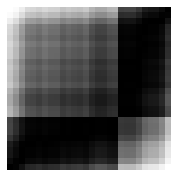

In [20]:
il[0].show()

In [21]:
sd = il.split_by_rand_pct(valid_pct = 0.2)

In [22]:
sd

ItemLists;

Train: ImageList (899 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /content/drive/MyDrive/Project 2/data;

Valid: ImageList (224 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /content/drive/MyDrive/Project 2/data;

Test: None

In [23]:
ll = sd.label_from_folder()

In [24]:
ll

LabelLists;

Train: LabelList (899 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
Bullish,Bullish,Bullish,Bullish,Bullish
Path: /content/drive/MyDrive/Project 2/data;

Valid: LabelList (224 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
Bullish,Neutral,Neutral,Bearish,Bearish
Path: /content/drive/MyDrive/Project 2/data;

Test: None

In [25]:
x,y = ll.train[0]

Bullish torch.Size([3, 28, 28])


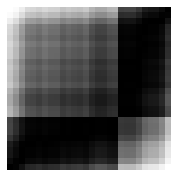

In [26]:
x.show()
print(y,x.shape)

In [27]:
bs = 128

In [28]:
# not using imagenet_stats because not using pretrained model
data = ll.databunch(bs=bs).normalize()

In [29]:
x,y = data.train_ds[0]

Bullish


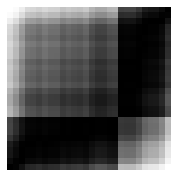

In [30]:
x.show()
print(y)

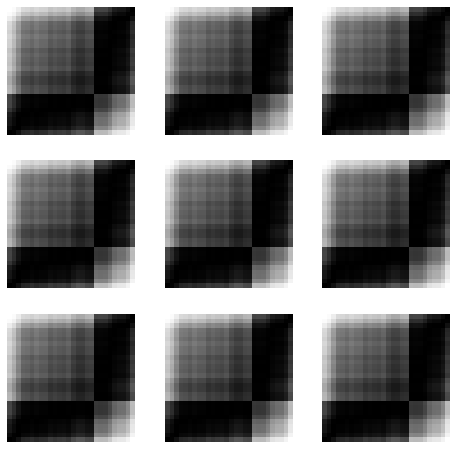

In [31]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [32]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([128, 3, 28, 28]), torch.Size([128]))

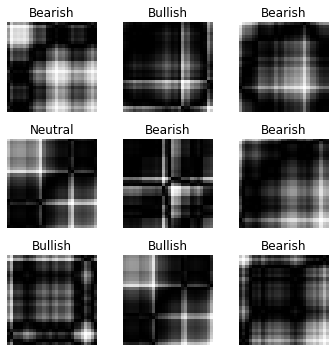

In [33]:
data.show_batch(rows=3, figsize=(5,5))

In [34]:
#Basic CNN

In [35]:
def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [39]:
model = nn.Sequential(
    conv(3, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, n_classes), # 1
    nn.BatchNorm2d(n_classes),
    Flatten()     # remove (1,1) grid
)

In [40]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss, metrics=accuracy)

In [41]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          224        True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [42]:
xb = xb.cuda()

In [43]:
model(xb).shape

torch.Size([128, 3])

In [44]:
learn.lr_find(end_lr=2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


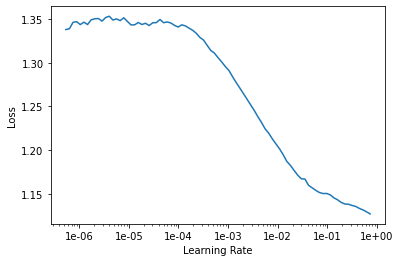

In [45]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(3, max_lr=0.03)

epoch,train_loss,valid_loss,accuracy,time
0,1.226263,1.107959,0.316964,00:19
1,1.156873,1.112818,0.343750,00:01
2,1.125535,1.102613,0.343750,00:01


In [47]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [48]:
model = nn.Sequential(
    conv2(3, 8),   # 14
    conv2(8, 16),  # 7
    conv2(16, 32), # 4
    conv2(32, 16), # 2
    conv2(16, n_classes), # 1
    Flatten()      # remove (1,1) grid
)

In [49]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [50]:
learn.fit_one_cycle(10, max_lr=0.03)

epoch,train_loss,valid_loss,accuracy,time
0,1.351334,1.132486,0.290179,00:01
1,1.176290,1.137299,0.303571,00:01
2,1.089702,1.257805,0.325893,00:01
3,1.023933,1.396730,0.316964,00:01
4,0.965055,1.360323,0.352679,00:01
5,0.910643,1.485433,0.334821,00:01
6,0.861270,1.422232,0.325893,00:01
7,0.800716,1.373414,0.330357,00:01
8,0.747782,1.369638,0.321429,00:01
9,0.700987,1.355411,0.316964,00:01


In [52]:
# ResNet

In [53]:

class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

In [55]:
model = nn.Sequential(
    conv2(3, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, n_classes),
    Flatten()
)

In [56]:
def conv_and_res(ni,nf): return nn.Sequential(conv2(ni, nf), res_block(nf))

In [57]:
model = nn.Sequential(
    conv_and_res(3, 8),
    conv_and_res(8, 16),
    conv_and_res(16, 32),
    conv_and_res(32, 16),
    conv2(16, n_classes),
    Flatten()
)

In [58]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


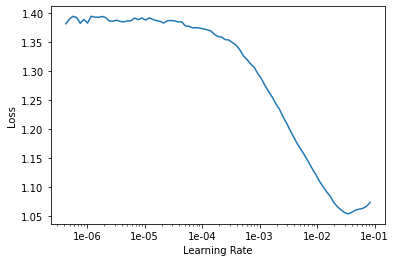

In [59]:
learn.lr_find(end_lr=0.2)
learn.recorder.plot()

In [84]:
learn.fit_one_cycle(50, max_lr=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,0.233194,1.660783,0.392857,00:01
1,0.233206,1.710879,0.383929,00:01
2,0.244195,1.726690,0.388393,00:01
3,0.453257,5.415388,0.330357,00:01
4,0.676766,31.885237,0.321429,00:01
5,0.776515,12.940017,0.343750,00:01
6,0.845077,8.350775,0.312500,00:01
7,0.895290,1.646918,0.316964,00:01
8,0.933809,1.229337,0.321429,00:01
9,0.961050,1.114318,0.321429,00:01


In [74]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          216        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
___________________________________________________

In [ ]:
#predict

In [85]:
arr = plt.imread('/content/drive/MyDrive/Project 2/data/Bearish/2017-02-23.png')
img = pil2tensor(arr,dtype= np.float32)

In [86]:
arr2= plt.imread('/content/drive/MyDrive/Project 2/data/Neutral/2017-04-20.png')
img2 = pil2tensor(arr,dtype= np.float32)

In [87]:
learn.predict(Image(img))

(Category tensor(0), tensor(0), tensor([0.3714, 0.3526, 0.2760]))

In [88]:
learn.predict_(Image(img2))

(Category tensor(0), tensor(0), tensor([0.3714, 0.3526, 0.2760]))

In [91]:
img_arr = data.valid_ds.x #images, whereas y is the label array
preds = [learn.predict(i) for i in img_arr]

In [95]:
img_arr.items

array([PosixPath('/content/drive/MyDrive/Project 2/data/Bullish/2018-08-29.png'),
       PosixPath('/content/drive/MyDrive/Project 2/data/Neutral/2017-11-07.png'),
       PosixPath('/content/drive/MyDrive/Project 2/data/Neutral/2021-01-13.png'),
       PosixPath('/content/drive/MyDrive/Project 2/data/Bearish/2021-03-05.png'), ...,
       PosixPath('/content/drive/MyDrive/Project 2/data/Neutral/2020-01-17.png'),
       PosixPath('/content/drive/MyDrive/Project 2/data/Bearish/2018-10-26.png'),
       PosixPath('/content/drive/MyDrive/Project 2/data/Neutral/2018-02-20.png'),
       PosixPath('/content/drive/MyDrive/Project 2/data/Bullish/2018-04-03.png')], dtype=object)

In [92]:
preds

[(Category tensor(1), tensor(1), tensor([0.2268, 0.6973, 0.0760])),
 (Category tensor(0), tensor(0), tensor([0.5986, 0.2862, 0.1152])),
 (Category tensor(2), tensor(2), tensor([0.3972, 0.1946, 0.4082])),
 (Category tensor(2), tensor(2), tensor([0.4320, 0.0699, 0.4981])),
 (Category tensor(2), tensor(2), tensor([0.1388, 0.0538, 0.8074])),
 (Category tensor(1), tensor(1), tensor([0.1316, 0.8122, 0.0562])),
 (Category tensor(2), tensor(2), tensor([0.2768, 0.1403, 0.5829])),
 (Category tensor(0), tensor(0), tensor([0.4415, 0.4316, 0.1268])),
 (Category tensor(2), tensor(2), tensor([0.0739, 0.0139, 0.9122])),
 (Category tensor(0), tensor(0), tensor([0.7773, 0.0962, 0.1266])),
 (Category tensor(2), tensor(2), tensor([0.1323, 0.3263, 0.5414])),
 (Category tensor(0), tensor(0), tensor([0.7465, 0.0870, 0.1665])),
 (Category tensor(2), tensor(2), tensor([0.0160, 0.0066, 0.9774])),
 (Category tensor(1), tensor(1), tensor([0.3667, 0.4359, 0.1974])),
 (Category tensor(2), tensor(2), tensor([0.2871,

In [101]:
data.classes

['Bearish', 'Bullish', 'Neutral']

In [106]:
preds[:10]

[(Category tensor(1), tensor(1), tensor([0.2268, 0.6973, 0.0760])),
 (Category tensor(0), tensor(0), tensor([0.5986, 0.2862, 0.1152])),
 (Category tensor(2), tensor(2), tensor([0.3972, 0.1946, 0.4082])),
 (Category tensor(2), tensor(2), tensor([0.4320, 0.0699, 0.4981])),
 (Category tensor(2), tensor(2), tensor([0.1388, 0.0538, 0.8074])),
 (Category tensor(1), tensor(1), tensor([0.1316, 0.8122, 0.0562])),
 (Category tensor(2), tensor(2), tensor([0.2768, 0.1403, 0.5829])),
 (Category tensor(0), tensor(0), tensor([0.4415, 0.4316, 0.1268])),
 (Category tensor(2), tensor(2), tensor([0.0739, 0.0139, 0.9122])),
 (Category tensor(0), tensor(0), tensor([0.7773, 0.0962, 0.1266]))]

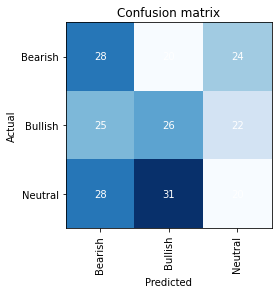

In [108]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

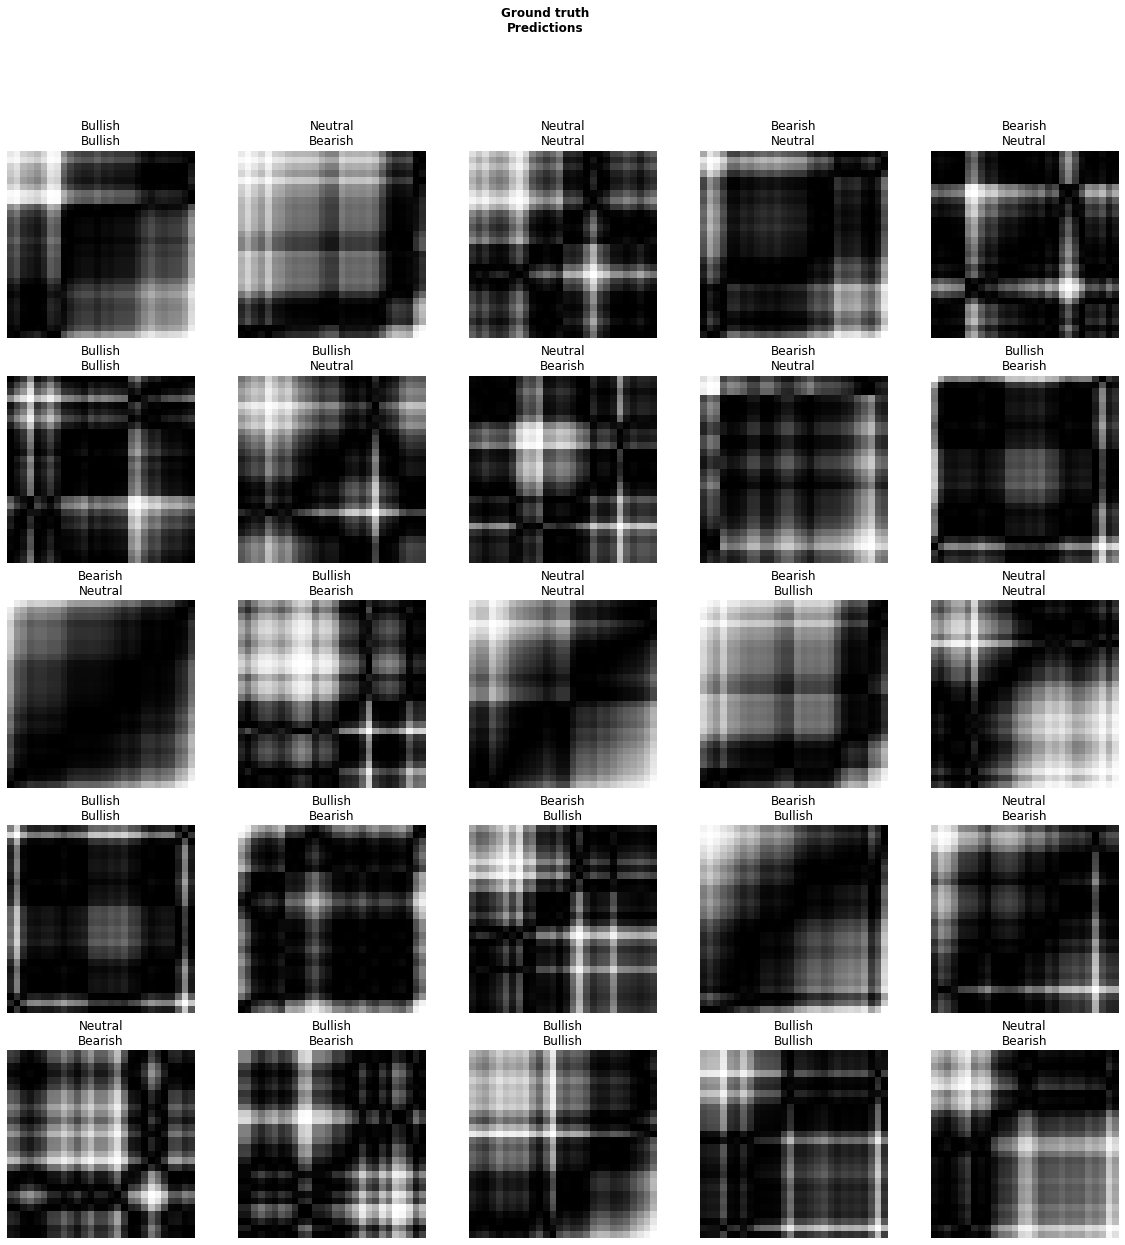

In [111]:
learn.show_results(row=3)

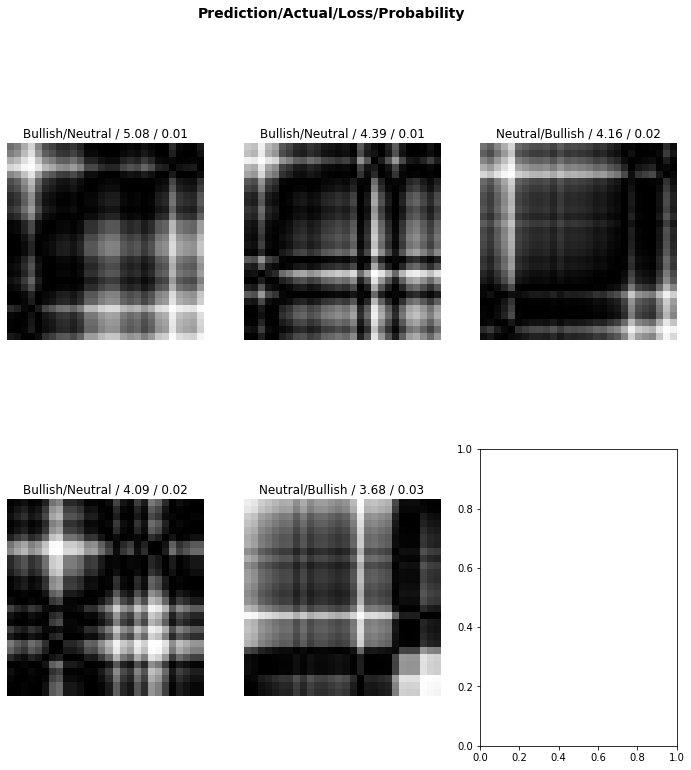

In [116]:
interp.plot_top_losses(5)
plt.show()

In [ ]:
learn.export()